In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
df=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\new_df.xlsx')

In [3]:

df.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,...,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team
0,-2.5,2.5,52.0,NaN,172.0,34.4,119.0,23.8,2211.0,442.2,...,35.666667,121.0,24.2,2477.0,495.4,46.5,9.30,-87.5,-17.5,3.0
1,6.5,-6.5,49.0,41.0,187.0,37.4,118.0,23.6,2484.0,496.8,...,39.333333,111.0,22.2,2194.0,438.8,50.5,10.10,-109.5,-21.9,1.0
2,6.5,-6.5,27.0,27.0,114.0,22.8,100.0,20.0,1791.0,358.2,...,27.666667,117.0,23.4,2074.0,414.8,34.5,6.90,-18.5,-3.7,11.0
3,19.5,-19.5,55.5,22.0,123.0,24.6,111.0,22.2,1998.0,399.6,...,38.000000,125.0,25.0,2618.0,523.6,50.9,10.18,-110.5,-22.1,1.0
4,31.5,-31.5,63.5,21.0,88.0,17.6,81.0,16.2,1569.0,313.8,...,28.666667,102.0,20.4,2134.0,426.8,51.0,10.20,34.0,6.8,99.0


In [4]:
Champ_game = df.loc[0]
df = df.loc[1:]

In [5]:
df.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Home Score_x_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,...,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team
1,6.5,-6.5,49.0,41.0,187.0,37.4,118.0,23.6,2484.0,496.8,...,39.333333,111.0,22.2,2194.0,438.8,50.5,10.10,-109.5,-21.9,1.0
2,6.5,-6.5,27.0,27.0,114.0,22.8,100.0,20.0,1791.0,358.2,...,27.666667,117.0,23.4,2074.0,414.8,34.5,6.90,-18.5,-3.7,11.0
3,19.5,-19.5,55.5,22.0,123.0,24.6,111.0,22.2,1998.0,399.6,...,38.000000,125.0,25.0,2618.0,523.6,50.9,10.18,-110.5,-22.1,1.0
4,31.5,-31.5,63.5,21.0,88.0,17.6,81.0,16.2,1569.0,313.8,...,28.666667,102.0,20.4,2134.0,426.8,51.0,10.20,34.0,6.8,99.0
5,-14.5,14.5,63.0,34.0,156.0,31.2,125.0,25.0,2280.0,456.0,...,20.333333,93.0,18.6,1827.0,365.4,32.0,6.40,46.0,9.2,99.0


In [6]:
#df = pd.get_dummies(df,columns=['Away Team'],drop_first=True,prefix='A')

In [7]:
#df = pd.get_dummies(df,columns=['Home Team'],drop_first=True,prefix='H')

In [5]:
#df = df = pd.get_dummies(df,columns=['Year'],drop_first=True,prefix='Y')

In [6]:
df['Total Score'] = df['Away Score_x_x'] + df['Home Score_x_x']

In [7]:
df.drop('Away Score_x_x', axis=1, inplace=True)
df.drop('Home Score_x_x', axis=1, inplace=True)

In [8]:
df.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass_Home_Team,...,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team,Total Score
1,6.5,-6.5,49.0,187.0,37.4,118.0,23.6,2484.0,496.8,49.3,...,111.0,22.2,2194.0,438.8,50.5,10.10,-109.5,-21.9,1.0,65.0
2,6.5,-6.5,27.0,114.0,22.8,100.0,20.0,1791.0,358.2,30.9,...,117.0,23.4,2074.0,414.8,34.5,6.90,-18.5,-3.7,11.0,51.0
3,19.5,-19.5,55.5,123.0,24.6,111.0,22.2,1998.0,399.6,38.5,...,125.0,25.0,2618.0,523.6,50.9,10.18,-110.5,-22.1,1.0,46.0
4,31.5,-31.5,63.5,88.0,17.6,81.0,16.2,1569.0,313.8,31.4,...,102.0,20.4,2134.0,426.8,51.0,10.20,34.0,6.8,99.0,66.0
5,-14.5,14.5,63.0,156.0,31.2,125.0,25.0,2280.0,456.0,40.4,...,93.0,18.6,1827.0,365.4,32.0,6.40,46.0,9.2,99.0,51.0


In [9]:
#df.drop('Date', axis=1, inplace=True)

In [10]:
pd.set_option('Max_columns',None)
pd.set_option('Max_rows',None)

In [11]:
df.dtypes

Home Team Spread_x                                 float64
Away Team Spread_x                                 float64
Total_x                                            float64
Rolling 5 Past H&A Score_Home_Team                 float64
Rolling 5 Past H&A Score Avg_Home_Team             float64
Rolling 5 Past H&A 1st Downs_Home_Team             float64
Rolling 5 Past H&A 1st Downs Avg_Home_Team         float64
Rolling 5 Past H&A Total Yards_Home_Team           float64
Rolling 5 Past H&A Total Yards Avg_Home_Team       float64
Rolling 5 Past H&A Yards per Pass_Home_Team        float64
Rolling 5 Past H&A Yards per Pass Avg_Home_Team    float64
Rolling 5 Past H&A Spread_Home_Team                float64
Rolling 5 Past H&A Spread Avg_Home_Team            float64
Rolling 5 Past H&A Spread Min_Home_Team            float64
Rolling 5 Past H&A Score_Away_Team                 float64
Rolling 5 Past H&A Score Avg_Away_Team             float64
Rolling 5 Past H&A Score Max_Away_Team             float

In [12]:
df.shape

(976, 29)

In [13]:
df.isnull().sum().max()

41

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().max()

0

In [16]:
df.shape

(928, 29)

# 4.6 Train/Test Split

In [17]:
len(df) * .8, len(df) * .2

(742.4000000000001, 185.60000000000002)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Total Score'), 
                                                    df['Total Score'], test_size=0.2, 
                                                    random_state=42)

In [19]:
X_train.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,Rolling 5 Past H&A Score_Away_Team,Rolling 5 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A Score Max_Away_Team,Rolling 3 Past H&A Score_Away_Team,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team
382,-7.0,7.0,54.5,103.0,20.6,92.0,18.4,1770.0,354.0,36.9,7.38,28.0,5.6,-2.5,111.0,22.2,44.0,60.0,20.000000,107.0,21.4,1978.0,395.6,36.8,7.36,15.0,3.0,99.0
500,-6.5,6.5,66.0,185.0,37.0,117.0,23.4,2355.0,471.0,44.4,8.88,-26.5,-5.3,-15.5,171.0,34.2,51.0,131.0,43.666667,113.0,22.6,2050.0,410.0,31.8,6.36,28.5,5.7,99.0
98,-4.5,4.5,54.5,203.0,40.6,130.0,26.0,2436.0,487.2,46.6,9.32,-74.0,-14.8,-21.0,128.0,25.6,41.0,95.0,31.666667,100.0,20.0,1750.0,350.0,30.8,6.16,18.5,3.7,99.0
251,13.5,-13.5,57.0,99.0,19.8,97.0,19.4,1658.0,331.6,28.7,5.74,71.0,14.2,-3.0,117.0,23.4,45.0,104.0,34.666667,99.0,19.8,1771.0,354.2,26.5,5.30,6.0,1.2,16.0
199,-13.0,13.0,68.0,106.0,21.2,115.0,23.0,1957.0,391.4,34.9,6.98,21.0,4.2,-5.5,120.0,24.0,44.0,97.0,32.333333,120.0,24.0,2250.0,450.0,36.6,7.32,30.0,6.0,99.0


In [20]:
X_train.shape

(742, 28)

In [21]:
X_test.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,Rolling 5 Past H&A Score_Away_Team,Rolling 5 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A Score Max_Away_Team,Rolling 3 Past H&A Score_Away_Team,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team
758,-16.5,16.5,43.5,139.0,27.8,102.0,20.4,1734.0,346.8,37.8,7.56,-35.0,-7.0,-12.0,99.0,19.8,24.0,51.0,17.000000,65.0,13.0,1067.0,213.4,26.3,5.26,31.5,6.3,13.0
670,7.0,-7.0,56.0,153.0,30.6,94.0,18.8,1908.0,381.6,46.2,9.24,-7.5,-1.5,-11.5,125.0,25.0,32.0,89.0,29.666667,100.0,20.0,1933.0,386.6,43.0,8.60,-36.5,-7.3,2.0
31,1.0,-1.0,82.5,176.0,35.2,116.0,23.2,2331.0,466.2,50.3,10.06,9.5,1.9,-15.0,211.0,42.2,59.0,121.0,40.333333,120.0,24.0,2718.0,543.6,56.8,11.36,-13.0,-2.6,17.0
389,2.5,-2.5,60.0,142.0,28.4,104.0,20.8,1836.0,367.2,35.7,7.14,-38.0,-7.6,-15.0,190.0,38.0,63.0,93.0,31.000000,118.0,23.6,2268.0,453.6,40.8,8.16,-46.5,-9.3,8.0
193,-22.0,22.0,50.5,236.0,47.2,132.0,26.4,2848.0,569.6,64.3,12.86,-131.0,-26.2,-35.0,67.0,13.4,28.0,54.0,18.000000,78.0,15.6,1465.0,293.0,25.9,5.18,-9.0,-1.8,99.0


In [22]:
X_test.shape

(186, 28)

In [23]:
y_train.head()

382    100.0
500     67.0
98      76.0
251     49.0
199     62.0
Name: Total Score, dtype: float64

In [24]:
y_train.shape

(742,)

In [25]:
y_test.head()

758    38.0
670    44.0
31     57.0
389    69.0
193    24.0
Name: Total Score, dtype: float64

In [26]:
y_test.shape

(186,)

In [27]:
train_mean = y_train.mean()
train_mean

51.10916442048517

In [28]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[51.10916442]])

# 4.7.1 Metrics 

4.7.1.1 R-squared, or coefficient of determination

In [29]:
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 -  sum_sq_res / sum_sq_tot
    return R2

In [30]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([51.10916442, 51.10916442, 51.10916442, 51.10916442, 51.10916442])

In [31]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([51.10916442, 51.10916442, 51.10916442, 51.10916442, 51.10916442])

In [32]:
r_squared(y_train, y_tr_pred)

0.0

In [33]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.002881833719414084

# 4.7.1.2 Mean Absolute Error
#This is very simply the average of the absolute errors:

In [34]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(ypred - y)
    mae = np.mean(abs_error)
    return mae

In [35]:
mae(y_train, y_tr_pred)

14.892459368938042

In [36]:
mae(y_test, y_te_pred)

14.031576964321946

In [37]:
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (ypred - y)**2
    mse = np.mean(sq_error)
    return mse

In [38]:
mse(y_train, y_tr_pred)

362.3425305686525

In [39]:
mse(y_test, y_te_pred)

314.05486965741443

In [40]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([19.03529697, 17.72159332])

# 4.7.1.3 Mean Squared Error
Another common metric (and an important one internally for optimizing machine learning models) is the mean squared error. This is simply the average of the square of the errors:

In [41]:
#Code task 8#
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (ypred - y)**2
    mse = np.mean(sq_error)
    return mse

In [42]:
mse(y_train, y_tr_pred)

362.3425305686525

In [43]:
mse(y_test, y_te_pred)

314.05486965741443

In [44]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([19.03529697, 17.72159332])

# 4.7.2 sklearn metrics
Functions are good, but you don't want to have to define functions every time we want to assess performance. sklearn.metrics provides many commonly used metrics, included the ones above.

In [45]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.002881833719414084)

In [46]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(14.892459368938033, 14.031576964321943)

In [47]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(362.3425305686532, 314.0548696574141)

# 4.7.3 Note On Calculating Metrics
When calling functions to calculate metrics, it is important to take care in the order of the arguments. Two of the metrics above actually don't care if the arguments are reversed; one does. Which one cares?

In a Jupyter code cell, running r2_score? will bring up the docstring for the function, and r2_score?? will bring up the actual code of the function! Try them and compare the source for sklearn's function with yours. Feel free to explore what happens when you reverse the order of the arguments and compare behaviour of sklearn's function and yours.

In [48]:
# train set - sklearn
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, 0.0)

In [49]:
# test set - sklearn
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.002881833719414084, -6.220497562903427e+30)

In [50]:
# train set - using our homebrew function
# correct order, incorrect order
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)


<ipython-input-29-4661c1ed3f49>:13: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1.0 -  sum_sq_res / sum_sq_tot


(0.0, -inf)

In [51]:
# test set - using our homebrew function
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(-0.002881833719414084, -6.220497562903427e+30)

# 4.8 Initial Models
4.8.1 Imputing missing feature (predictor) values
Recall when performing EDA, you imputed (filled in) some missing values in pandas. You did this judiciously for exploratory/visualization purposes. You left many missing values in the data. You can impute missing values using scikit-learn, but note that you should learn values to impute from a train split and apply that to the test split to then assess how well your imputation worked.

4.8.1.1 Impute missing values with median
There's missing values. Recall from your data exploration that many distributions were skewed. Your first thought might be to impute missing values using the median.

4.8.1.1.1 Learn the values to impute from the train set

In [52]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

Home Team Spread_x                                   -3.25
Away Team Spread_x                                    3.25
Total_x                                              50.50
Rolling 5 Past H&A Score_Home_Team                  124.00
Rolling 5 Past H&A Score Avg_Home_Team               24.80
Rolling 5 Past H&A 1st Downs_Home_Team               97.00
Rolling 5 Past H&A 1st Downs Avg_Home_Team           19.40
Rolling 5 Past H&A Total Yards_Home_Team           1849.00
Rolling 5 Past H&A Total Yards Avg_Home_Team        369.80
Rolling 5 Past H&A Yards per Pass_Home_Team          35.50
Rolling 5 Past H&A Yards per Pass Avg_Home_Team       7.10
Rolling 5 Past H&A Spread_Home_Team                   1.50
Rolling 5 Past H&A Spread Avg_Home_Team               0.30
Rolling 5 Past H&A Spread Min_Home_Team             -11.50
Rolling 5 Past H&A Score_Away_Team                  125.00
Rolling 5 Past H&A Score Avg_Away_Team               25.00
Rolling 5 Past H&A Score Max_Away_Team               41.

In [53]:
#Code task 9#
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [54]:
#Code task 10#
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# 4.8.1.1.4 Train the model on the train split

In [55]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [56]:
#Code task 11#
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [57]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.22336955352107235, 0.16919696355853486)

In [58]:
#Code task 12#
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(13.217781552654387, 12.883969379244776)

In [59]:
#Code task 13#
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(281.40624129383764, 260.1679784675486)

# 4.8.1.2 Impute missing values with the mean
You chose to use the median for filling missing values because of the skew of many of our predictor feature distributions. What if you wanted to try something else, such as the mean?

In [60]:
#Code task 14#
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

Home Team Spread_x                                   -3.299191
Away Team Spread_x                                    3.299191
Total_x                                              51.659704
Rolling 5 Past H&A Score_Home_Team                  127.638814
Rolling 5 Past H&A Score Avg_Home_Team               25.527763
Rolling 5 Past H&A 1st Downs_Home_Team               98.184636
Rolling 5 Past H&A 1st Downs Avg_Home_Team           19.636927
Rolling 5 Past H&A Total Yards_Home_Team           1860.398922
Rolling 5 Past H&A Total Yards Avg_Home_Team        372.079784
Rolling 5 Past H&A Yards per Pass_Home_Team          35.995418
Rolling 5 Past H&A Yards per Pass Avg_Home_Team       7.199084
Rolling 5 Past H&A Spread_Home_Team                   1.398248
Rolling 5 Past H&A Spread Avg_Home_Team               0.279650
Rolling 5 Past H&A Spread Min_Home_Team             -11.487197
Rolling 5 Past H&A Score_Away_Team                  126.991914
Rolling 5 Past H&A Score Avg_Away_Team               25

# 4.8.1.2.2 Apply the imputation to both train and test splits

In [61]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

# 4.8.1.2.3 Scale the data

In [62]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# 4.8.1.2.4 Train the model on the train split

In [63]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

# .8.1.2.5 Make predictions using the model on both train and test splits

In [64]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

# 4.8.1.2.6 Assess model performance

In [65]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.22336955352107235, 0.16919696355853486)

In [66]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(13.217781552654387, 12.883969379244776)

In [67]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(281.40624129383764, 260.1679784675486)

# 4.8.2 Pipelines
One of the most important and useful components of sklearn is the pipeline. In place of panda's fillna DataFrame method, there is sklearn's SimpleImputer. Remember the first linear model above performed the steps:

# 4.8.2.1 Define the pipeline

In [68]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [69]:
type(pipe)

sklearn.pipeline.Pipeline

In [70]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [71]:
#Code task 15#
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [72]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [73]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(0.22336955352107235, 0.16919696355853486)

In [74]:
median_r2

(0.22336955352107235, 0.16919696355853486)

In [75]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(13.217781552654387, 12.883969379244776)

In [76]:
#Compare with your earlier result:

In [77]:
median_mae

(13.217781552654387, 12.883969379244776)

In [78]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(281.40624129383764, 260.1679784675486)

# Compare with your earlier result:

In [79]:
median_mse

(281.40624129383764, 260.1679784675486)

# 4.9 Refining The Linear Model
You suspected the model was overfitting. This is no real surprise given the number of features you blindly used. It's likely a judicious subset of features would generalize better. sklearn has a number of feature selection functions available. The one you'll use here is SelectKBest which, as you might guess, selects the k best features. You can read about SelectKBest here. f_regression is just the score function you're using because you're performing regression. It's important to choose an appropriate one for your machine learning task.

# 4.9.1 Define the pipeline
Redefine your pipeline to include this feature selection step:

In [80]:
#Code task 16#
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

# 4.9.2 Fit the pipeline

In [81]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fd4e7bed790>)),
                ('linearregression', LinearRegression())])

In [82]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [83]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.21300948214868554, 0.16177228514877984)

In [84]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(13.268257990030355, 12.9749311211763)

# 4.9.4 Define a new pipeline to select a different number of features

In [85]:
#Code task 17#
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

# 4.9.5 Fit the pipeline

In [86]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x7fd4e7bed790>)),
                ('linearregression', LinearRegression())])

# 4.9.6 Assess performance on train and test data

In [87]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [88]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.21411943750526596, 0.15995058185716204)

In [89]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(13.247692721081464, 12.975021396670464)

# 4.9.7 Assessing performance using cross-validation

In [90]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [91]:
cv_scores = cv_results['test_score']
cv_scores

array([0.16583493, 0.27222898, 0.26605564, 0.2411151 , 0.00333906])

In [92]:
np.mean(cv_scores), np.std(cv_scores)

(0.1897147420326511, 0.10058296897578548)

In [93]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([-0.01,  0.39])

# 4.9.8 Hyperparameter search using GridSearchCV

In [94]:
#Code task 18#
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [95]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [96]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [97]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fd4e7bed790>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28]})

In [98]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [99]:
lr_grid_cv.best_params_

{'selectkbest__k': 2}

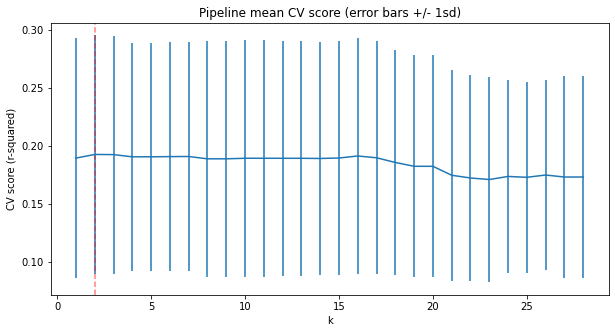

In [100]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [101]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [102]:
#Code task 21#
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Total_x                                       8.062055
Rolling 5 Past H&A 1st Downs Avg_Home_Team    1.265817
dtype: float64

# 4.10 Random Forest Model
A model that can work very well in a lot of cases is the random forest. For regression, this is provided by sklearn's RandomForestRegressor class.

Time to stop the bad practice of repeatedly checking performance on the test split. Instead, go straight from defining the pipeline to assessing performance using cross-validation. cross_validate will perform the fitting as part of the process. This uses the default settings for the random forest so you'll then proceed to investigate some different hyperparameters.

In [103]:
#Code task 22#
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

# 4.10.2 Fit and assess performance using cross-validation

In [104]:
#Code task 23#
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train,y_train, cv=5)

In [105]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([ 0.13330799,  0.20181035,  0.16311723,  0.16262103, -0.02807084])

In [106]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.12655715194504277, 0.08031896007072868)

In [107]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [108]:
#Code task 24#
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [109]:
#Code task 25#
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [110]:
#Code task 26#
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [111]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([ 0.13257037,  0.21718933,  0.18560496,  0.17955633, -0.02600671])

In [112]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.13778285466863235, 0.08624564415880571)

In [113]:
#Code task 27#
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
#plt.subplots(figsize=(60, 10))
#imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
#rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
#rf_feat_imps.plot(kind='bar')
#plt.xlabel('features')
#plt.ylabel('importance')
#plt.title('Best random forest regressor feature importances');

# 4.11 Final Model Selection

# 4.11.1 Linear regression model performance

In [114]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [115]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(13.402211772130329, 0.8012697856186155)

In [116]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

13.097425069514145

In [117]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [118]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(13.828698985745968, 0.6691909241601304)

In [119]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

13.042865935339053

# 4.12 Data quantity assessment

In [120]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

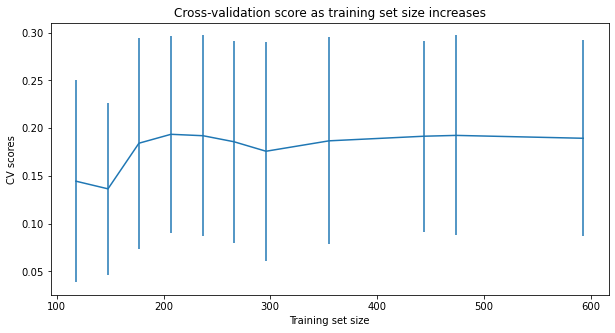

In [121]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [122]:
#Code task 28#
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = rf_grid_cv.best_estimator_


In [123]:
best_model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=297, random_state=47))])

# Prediction for upcoming games 10/16/21 test run

In [124]:
df2=pd.read_excel(r'/Users/markclampitt/Documents/Springboard/Capstone2/Data\new_df.xlsx')

In [120]:
#Upcoming_Game_df = pd.get_dummies(Upcoming_Game_df,columns=['Away Team'],drop_first=True,prefix='A')

In [121]:
#Upcoming_Game_df = pd.get_dummies(Upcoming_Game_df,columns=['Home Team'],drop_first=True,prefix='H')

In [122]:
#Upcoming_Game_df = pd.get_dummies(Upcoming_Game_df,columns=['Year'],drop_first=True,prefix='Y')

In [126]:
df2['Total Score'] = df2['Home Score_x_x']+ df2['Away Score_x_x']

In [127]:
df2.drop('Away Score_x_x', axis=1, inplace=True)
df2.drop('Home Score_x_x', axis=1, inplace=True)

In [128]:
#Upcoming_Game_df.drop('Date', axis=1, inplace=True)

In [129]:
best_model.X_columns = [col for col in X_train.columns]

In [130]:
best_model.X_columns

['Home Team Spread_x',
 'Away Team Spread_x',
 'Total_x',
 'Rolling 5 Past H&A Score_Home_Team',
 'Rolling 5 Past H&A Score Avg_Home_Team',
 'Rolling 5 Past H&A 1st Downs_Home_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Home_Team',
 'Rolling 5 Past H&A Total Yards_Home_Team',
 'Rolling 5 Past H&A Total Yards Avg_Home_Team',
 'Rolling 5 Past H&A Yards per Pass_Home_Team',
 'Rolling 5 Past H&A Yards per Pass Avg_Home_Team',
 'Rolling 5 Past H&A Spread_Home_Team',
 'Rolling 5 Past H&A Spread Avg_Home_Team',
 'Rolling 5 Past H&A Spread Min_Home_Team',
 'Rolling 5 Past H&A Score_Away_Team',
 'Rolling 5 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A Score Max_Away_Team',
 'Rolling 3 Past H&A Score_Away_Team',
 'Rolling 3 Past H&A Score Avg_Away_Team',
 'Rolling 5 Past H&A 1st Downs_Away_Team',
 'Rolling 5 Past H&A 1st Downs Avg_Away_Team',
 'Rolling 5 Past H&A Total Yards_Away_Team',
 'Rolling 5 Past H&A Total Yards Avg_Away_Team',
 'Rolling 5 Past H&A Yards per Pass_Away_Team',
 'Rolling

In [131]:
df2.shape

(977, 29)

best_model.X_column = Upcoming_Game_df[[ 'Home Team Spread_x',                             
'Rolling 5 Past H&A Spread Min_Away_Team',           
'Rolling 3 Past H&A Ranking Avg_Away_Team' ,          
'Rolling 3 Past H&A Ranking_Away_Team'  ,             
'Rolling 3 Past Away Ranking' ,                       
'Rolling 3 Past Away Ranking Avg'   ,                 
'Rolling 3 Past H&A Spread Avg_Away_Team' ,           
'Rolling 3 Past H&A Spread_Away_Team'   ,            
'Rolling 5 Past H&A Total Yards_Away_Team'  ,         
'Rolling 5 Past H&A Total Yards Avg_Away_Team' ,     
'Away Team Ranking_x',                                
'Rolling 5 Past H&A Yards per Pass Avg_Away_Team',    
'Rolling 5 Past H&A Yards per Pass_Away_Team' ,       
'Rolling 5 Past H&A Score_Away_Team',                 
'Rolling 5 Past H&A Score Avg_Away_Team' ,            
'Rolling 3 Past Away Spread',                         
'Rolling 3 Past Away Spread Avg' ,                    
'Rolling 5 Past H&A Spread Avg_Away_Team' ,           
'Rolling 5 Past H&A Spread_Away_Team' ,               
'Rolling 5 Past H&A Ranking Max_Away_Team' ,         
'Rolling 5 Past Away Ranking Max' ,                  
'Rolling 5 Past Away Spread Min',                    
'Rolling 5 Past Away Spread Avg' ,                   
'Rolling 5 Past Away Spread' ,                       
'Rolling 3 Past H&A Ranking Min_Away_Team'  ,        
'Rolling 5 Past H&A Ranking_Away_Team' ,             
'Rolling 5 Past H&A Ranking Avg_Away_Team'  ,        
'Rolling 3 Past H&A Spread Min_Away_Team',          
'Previous H&A Ranking_Away_Team' ,                   
'Rolling 3 Past Away Ranking Max' ,                  
'Away Team Spread_x' ]]                              

In [132]:
df2.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,Rolling 5 Past H&A Score_Away_Team,Rolling 5 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A Score Max_Away_Team,Rolling 3 Past H&A Score_Away_Team,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team,Total Score
0,-2.5,2.5,52.0,172.0,34.4,119.0,23.8,2211.0,442.2,46.6,9.32,-101.5,-20.3,-40.0,179.0,35.8,52.0,107.0,35.666667,121.0,24.2,2477.0,495.4,46.5,9.30,-87.5,-17.5,3.0,NaN
1,6.5,-6.5,49.0,187.0,37.4,118.0,23.6,2484.0,496.8,49.3,9.86,-111.5,-22.3,-29.0,182.0,36.4,43.0,118.0,39.333333,111.0,22.2,2194.0,438.8,50.5,10.10,-109.5,-21.9,1.0,65.0
2,6.5,-6.5,27.0,114.0,22.8,100.0,20.0,1791.0,358.2,30.9,6.18,55.5,11.1,2.0,159.0,31.8,44.0,83.0,27.666667,117.0,23.4,2074.0,414.8,34.5,6.90,-18.5,-3.7,11.0,51.0
3,19.5,-19.5,55.5,123.0,24.6,111.0,22.2,1998.0,399.6,38.5,7.70,-6.5,-1.3,-7.0,201.0,40.2,52.0,114.0,38.000000,125.0,25.0,2618.0,523.6,50.9,10.18,-110.5,-22.1,1.0,46.0
4,31.5,-31.5,63.5,88.0,17.6,81.0,16.2,1569.0,313.8,31.4,6.28,112.5,22.5,16.0,157.0,31.4,45.0,86.0,28.666667,102.0,20.4,2134.0,426.8,51.0,10.20,34.0,6.8,99.0,66.0


In [133]:
#Alabama_cols=['A_Arkansas','A_Auburn','A_Florida','A_Georgia','A_Kentucky','A_LSU','A_Mississippi State','A_Missouri','A_Ole Miss','A_South Carolina','A_Tennessee','A_Texas A&M','A_Vanderbilt']

In [137]:
X = df2.loc[(df2['Total Score'] >=0) , best_model.X_columns]
y = df2.loc[(df2['Total Score'] >=0), 'Total Score']

#example - dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]

#X = Updated_Game_df.loc['Date'] != "Big Mountain Resort", model.X_columns]
#y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']

In [138]:
len(X), len(y)

(976, 976)

In [139]:
X.head()

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,Rolling 5 Past H&A Score_Away_Team,Rolling 5 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A Score Max_Away_Team,Rolling 3 Past H&A Score_Away_Team,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team
1,6.5,-6.5,49.0,187.0,37.4,118.0,23.6,2484.0,496.8,49.3,9.86,-111.5,-22.3,-29.0,182.0,36.4,43.0,118.0,39.333333,111.0,22.2,2194.0,438.8,50.5,10.10,-109.5,-21.9,1.0
2,6.5,-6.5,27.0,114.0,22.8,100.0,20.0,1791.0,358.2,30.9,6.18,55.5,11.1,2.0,159.0,31.8,44.0,83.0,27.666667,117.0,23.4,2074.0,414.8,34.5,6.90,-18.5,-3.7,11.0
3,19.5,-19.5,55.5,123.0,24.6,111.0,22.2,1998.0,399.6,38.5,7.70,-6.5,-1.3,-7.0,201.0,40.2,52.0,114.0,38.000000,125.0,25.0,2618.0,523.6,50.9,10.18,-110.5,-22.1,1.0
4,31.5,-31.5,63.5,88.0,17.6,81.0,16.2,1569.0,313.8,31.4,6.28,112.5,22.5,16.0,157.0,31.4,45.0,86.0,28.666667,102.0,20.4,2134.0,426.8,51.0,10.20,34.0,6.8,99.0
5,-14.5,14.5,63.0,156.0,31.2,125.0,25.0,2280.0,456.0,40.4,8.08,14.0,2.8,-4.5,112.0,22.4,37.0,61.0,20.333333,93.0,18.6,1827.0,365.4,32.0,6.40,46.0,9.2,99.0


In [140]:
y.head()

1    65.0
2    51.0
3    46.0
4    66.0
5    51.0
Name: Total Score, dtype: float64

In [141]:
best_model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=297, random_state=47))])

In [142]:

#y = Upcoming_Game_df.drop('Away Score_x_x', axis=1)

#X = ski_data.loc[ski_data.Name != "Big Mountain Resort", model.X_columns]
#y = ski_data.loc[ski_data.Name != "Big Mountain Resort", 'AdultWeekend']

In [143]:
#y

In [144]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

In [145]:
cv_results = cross_validate(best_model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)


In [146]:
cv_results['test_score']

array([-15.15618773, -13.22353449, -13.72844686, -12.65939739,
       -13.05380299])

In [147]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(13.564273891892942, 0.8667903769209071)

In [148]:
#Alabama_cols = ['A_Arkansas','A_Auburn','A_Florida','A_Georgia','A_Kentucky','A_LSU','A_Mississippi State','A_Missouri','A_Ole Miss','A_South Carolina','A_Tennessee','A_Texas A&M','A_Vanderbilt','H_Arkansas']
                
                
                

In [149]:
X_bm = pd.DataFrame(df2.loc[0 , best_model.X_columns]).T
#X_bm = Upcoming_Game_df.loc[(Upcoming_Game_df[Alabama_cols].sum(axis=1) == 0) & (Upcoming_Game_df['Away Score_x_x'].isnull()) , best_model.X_columns]
y_bm = df2.loc[0, 'Total Score']



In [150]:
X_bm

,Home Team Spread_x,Away Team Spread_x,Total_x,Rolling 5 Past H&A Score_Home_Team,Rolling 5 Past H&A Score Avg_Home_Team,Rolling 5 Past H&A 1st Downs_Home_Team,Rolling 5 Past H&A 1st Downs Avg_Home_Team,Rolling 5 Past H&A Total Yards_Home_Team,Rolling 5 Past H&A Total Yards Avg_Home_Team,Rolling 5 Past H&A Yards per Pass_Home_Team,Rolling 5 Past H&A Yards per Pass Avg_Home_Team,Rolling 5 Past H&A Spread_Home_Team,Rolling 5 Past H&A Spread Avg_Home_Team,Rolling 5 Past H&A Spread Min_Home_Team,Rolling 5 Past H&A Score_Away_Team,Rolling 5 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A Score Max_Away_Team,Rolling 3 Past H&A Score_Away_Team,Rolling 3 Past H&A Score Avg_Away_Team,Rolling 5 Past H&A 1st Downs_Away_Team,Rolling 5 Past H&A 1st Downs Avg_Away_Team,Rolling 5 Past H&A Total Yards_Away_Team,Rolling 5 Past H&A Total Yards Avg_Away_Team,Rolling 5 Past H&A Yards per Pass_Away_Team,Rolling 5 Past H&A Yards per Pass Avg_Away_Team,Rolling 5 Past H&A Spread_Away_Team,Rolling 5 Past H&A Spread Avg_Away_Team,Previous H&A Ranking_Away_Team
0,-2.5,2.5,52.0,172.0,34.4,119.0,23.8,2211.0,442.2,46.6,9.32,-101.5,-20.3,-40.0,179.0,35.8,52.0,107.0,35.666667,121.0,24.2,2477.0,495.4,46.5,9.3,-87.5,-17.5,3.0


In [151]:
bm_pred = best_model.predict(X_bm).item()

In [152]:
bm_pred

48.81481481481482